In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/usa-covid/us_counties_covid19_daily.csv


# The dataset contains COVID-19 information from different counties and states in the USA in the year 2020.
### date: This column represents the specific date for which the COVID-19 data is recorded. It provides a temporal aspect to the dataset, allowing for analysis over time.
### county: The county column contains the name or identifier of the county to which the COVID-19 data belongs. Counties are administrative divisions within a state, and this column helps in identifying the geographic location of the data.
### state: The state column indicates the name of the state to which the COVID-19 data belongs. It provides information about the specific region within the USA.
### fips: FIPS stands for Federal Information Processing Standards, and this column represents a unique code assigned to each county in the USA. FIPS codes are useful for identifying and distinguishing counties within states.
### cases: The cases column contains the number of COVID-19 cases reported for a particular county and state on a specific date. It represents the total count of confirmed cases on that day.
### deaths: The deaths column represents the number of COVID-19 deaths reported for a particular county and state on a specific date. It indicates the total count of fatalities due to the virus on that day.

In [2]:
covid = pd.read_csv("/kaggle/input/usa-covid/us_counties_covid19_daily.csv")
covid

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
800432,2020-12-05,Sweetwater,Wyoming,56037.0,2098,10.0
800433,2020-12-05,Teton,Wyoming,56039.0,1739,2.0
800434,2020-12-05,Uinta,Wyoming,56041.0,1187,5.0
800435,2020-12-05,Washakie,Wyoming,56043.0,519,8.0


In [3]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800437 entries, 0 to 800436
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    800437 non-null  object 
 1   county  800437 non-null  object 
 2   state   800437 non-null  object 
 3   fips    792846 non-null  float64
 4   cases   800437 non-null  int64  
 5   deaths  783704 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 36.6+ MB


In [4]:
mean_fip = covid['fips'].mean()
mean_fip

31238.198828019566

In [5]:
covid['fips'].fillna(31238, inplace=True)
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800437 entries, 0 to 800436
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    800437 non-null  object 
 1   county  800437 non-null  object 
 2   state   800437 non-null  object 
 3   fips    800437 non-null  float64
 4   cases   800437 non-null  int64  
 5   deaths  783704 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 36.6+ MB


In [6]:
mean_deaths = covid['deaths'].mean()
mean_deaths

48.81530909629146

In [7]:
covid['deaths'].fillna(48, inplace=True)
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800437 entries, 0 to 800436
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    800437 non-null  object 
 1   county  800437 non-null  object 
 2   state   800437 non-null  object 
 3   fips    800437 non-null  float64
 4   cases   800437 non-null  int64  
 5   deaths  800437 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 36.6+ MB


In [8]:
covid['fips'] = covid['fips'].astype(int)
covid['deaths'] = covid['deaths'].astype(int)
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800437 entries, 0 to 800436
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    800437 non-null  object
 1   county  800437 non-null  object
 2   state   800437 non-null  object
 3   fips    800437 non-null  int64 
 4   cases   800437 non-null  int64 
 5   deaths  800437 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 36.6+ MB


#### Converting 'date' column from object datatype to datetime

In [9]:
covid['date'] = pd.to_datetime(covid['date'])
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800437 entries, 0 to 800436
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    800437 non-null  datetime64[ns]
 1   county  800437 non-null  object        
 2   state   800437 non-null  object        
 3   fips    800437 non-null  int64         
 4   cases   800437 non-null  int64         
 5   deaths  800437 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 36.6+ MB


In [10]:
covid

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061,1,0
1,2020-01-22,Snohomish,Washington,53061,1,0
2,2020-01-23,Snohomish,Washington,53061,1,0
3,2020-01-24,Cook,Illinois,17031,1,0
4,2020-01-24,Snohomish,Washington,53061,1,0
...,...,...,...,...,...,...
800432,2020-12-05,Sweetwater,Wyoming,56037,2098,10
800433,2020-12-05,Teton,Wyoming,56039,1739,2
800434,2020-12-05,Uinta,Wyoming,56041,1187,5
800435,2020-12-05,Washakie,Wyoming,56043,519,8


#### Extracting day_of_week and month from the date column

In [11]:
covid['day_of_week'] = covid['date'].dt.day_name()
covid['month'] = covid['date'].dt.month_name()
covid

,date,county,state,fips,cases,deaths,day_of_week,month
0,2020-01-21,Snohomish,Washington,53061,1,0,Tuesday,January
1,2020-01-22,Snohomish,Washington,53061,1,0,Wednesday,January
2,2020-01-23,Snohomish,Washington,53061,1,0,Thursday,January
3,2020-01-24,Cook,Illinois,17031,1,0,Friday,January
4,2020-01-24,Snohomish,Washington,53061,1,0,Friday,January
...,...,...,...,...,...,...,...,...
800432,2020-12-05,Sweetwater,Wyoming,56037,2098,10,Saturday,December
800433,2020-12-05,Teton,Wyoming,56039,1739,2,Saturday,December
800434,2020-12-05,Uinta,Wyoming,56041,1187,5,Saturday,December
800435,2020-12-05,Washakie,Wyoming,56043,519,8,Saturday,December


In [12]:
covid.describe()

,fips,cases,deaths
count,800437.000000,800437.000000,800437.000000
mean,31238.196942,1589.667358,48.798265
std,16211.768475,8385.201329,435.854574
min,1001.000000,0.000000,0.000000
25%,19011.000000,29.000000,0.000000
50%,30009.000000,175.000000,3.000000
75%,46081.000000,775.000000,19.000000
max,78030.000000,439538.000000,24346.000000


#### Converting the 'fips' column to string since it acts as ZIP Code kind of data and it needs to be in string for better analyzing

In [13]:
covid['fips'] = covid['fips'].astype(str)
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800437 entries, 0 to 800436
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   date         800437 non-null  datetime64[ns]
 1   county       800437 non-null  object        
 2   state        800437 non-null  object        
 3   fips         800437 non-null  object        
 4   cases        800437 non-null  int64         
 5   deaths       800437 non-null  int64         
 6   day_of_week  800437 non-null  object        
 7   month        800437 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 48.9+ MB


In [14]:
covid['county'].nunique()

1929

In [15]:
covid['state'].nunique()

55

In [16]:
covid['state'].unique()

array(['Washington', 'Illinois', 'California', 'Arizona', 'Massachusetts',
       'Wisconsin', 'Texas', 'Nebraska', 'Utah', 'Oregon', 'Florida',
       'New York', 'Rhode Island', 'Georgia', 'New Hampshire',
       'North Carolina', 'New Jersey', 'Colorado', 'Maryland', 'Nevada',
       'Tennessee', 'Hawaii', 'Indiana', 'Kentucky', 'Minnesota',
       'Oklahoma', 'Pennsylvania', 'South Carolina',
       'District of Columbia', 'Kansas', 'Missouri', 'Vermont',
       'Virginia', 'Connecticut', 'Iowa', 'Louisiana', 'Ohio', 'Michigan',
       'South Dakota', 'Arkansas', 'Delaware', 'Mississippi',
       'New Mexico', 'North Dakota', 'Wyoming', 'Alaska', 'Maine',
       'Alabama', 'Idaho', 'Montana', 'Puerto Rico', 'Virgin Islands',
       'Guam', 'West Virginia', 'Northern Mariana Islands'], dtype=object)

In [17]:
covid['fips'].nunique()

3218

#### Since the data seems to be cleaned, now let's start analyzing the data and draw insights from the dataset

## 1) How has the number of cases and deaths evolved over time in the dataset?

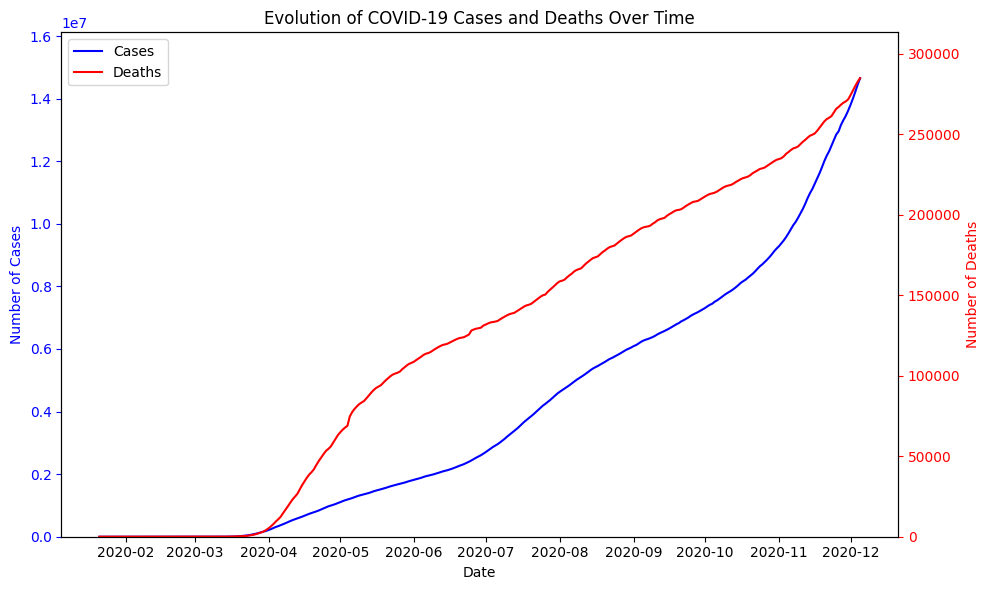

In [22]:
import matplotlib.pyplot as plt

daily_cases = covid.groupby('date')['cases'].sum()
daily_deaths = covid.groupby('date')['deaths'].sum()

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

ax1.plot(daily_cases.index, daily_cases, label='Cases', color='blue')
ax2.plot(daily_deaths.index, daily_deaths, label='Deaths', color='red')

ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Cases', color='blue')
ax2.set_ylabel('Number of Deaths', color='red')

ax1.set_ylim(0, daily_cases.max() + daily_cases.max() * 0.1)
ax2.set_ylim(0, daily_deaths.max() + daily_deaths.max() * 0.1)

ax1.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='red')

plt.title('Evolution of COVID-19 Cases and Deaths Over Time')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### From the graph, higher the cases, higher the deaths. And the cases and deaths seems to grow with the given timeline, it was lower at the start of the year; while the days passed, the cases and deaths were increasing linearly

## 2) Which states have the highest number of cases?

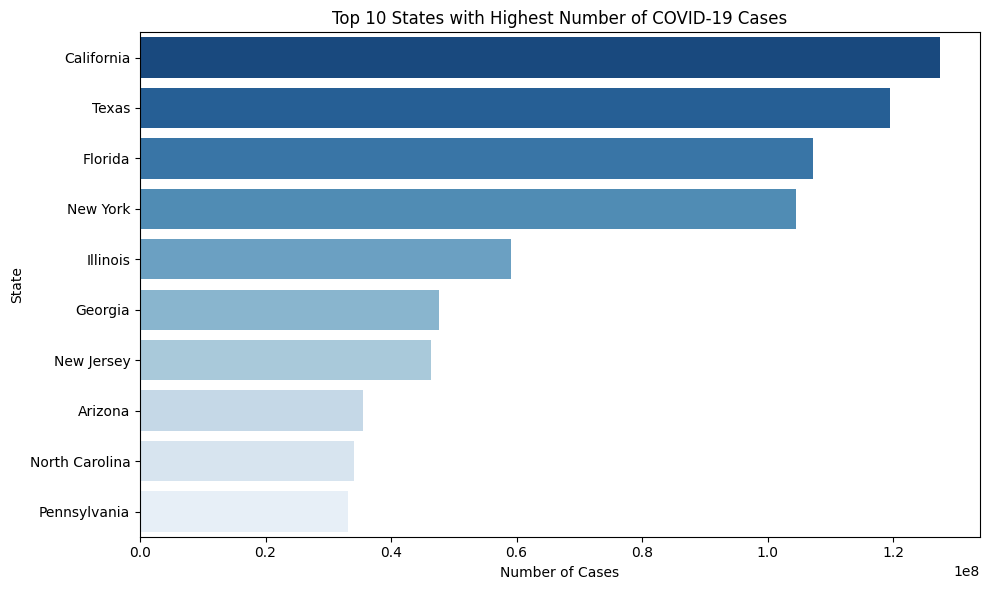

In [23]:
import seaborn as sns

state_cases = covid.groupby('state')['cases'].sum().sort_values(ascending=False).head(10)

colors = sns.color_palette('Blues_r', n_colors=len(state_cases))

plt.figure(figsize=(10, 6))
sns.barplot(x=state_cases.values, y=state_cases.index, palette=colors)

plt.title('Top 10 States with Highest Number of COVID-19 Cases')
plt.xlabel('Number of Cases')
plt.ylabel('State')

plt.tight_layout()
plt.show()

#### The states with highest California, Texas, Florida have highest number of cases through-out the year 2020

## 3) What is the distribution of cases and deaths across different counties?

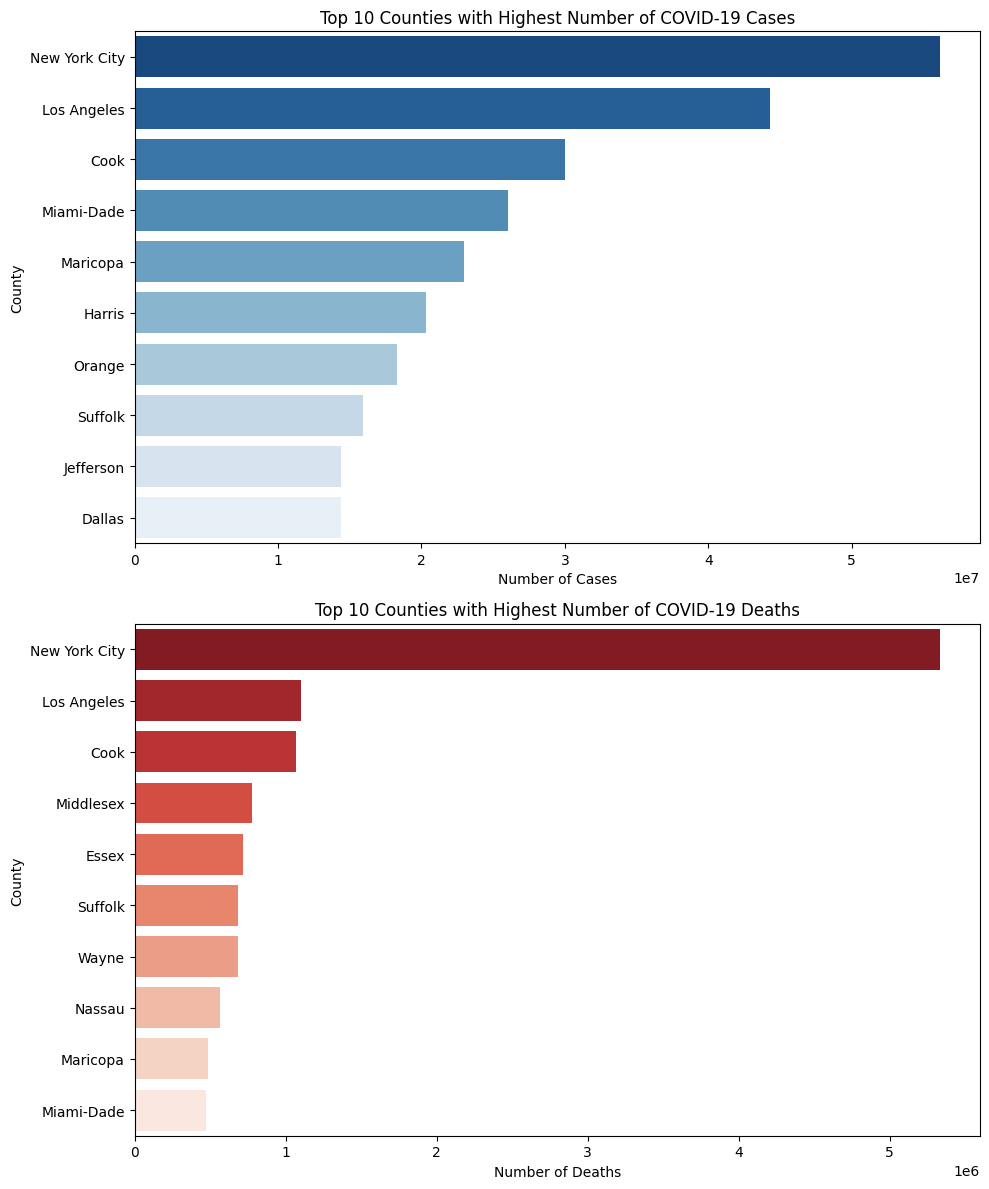

In [24]:
county_cases = covid.groupby('county')['cases'].sum().sort_values(ascending=False).head(10)
county_deaths = covid.groupby('county')['deaths'].sum().sort_values(ascending=False).head(10)

colors_cases = sns.color_palette('Blues_r', n_colors=len(county_cases))
colors_deaths = sns.color_palette('Reds_r', n_colors=len(county_deaths))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

sns.barplot(x=county_cases.values, y=county_cases.index, palette=colors_cases, ax=ax1)
ax1.set_title('Top 10 Counties with Highest Number of COVID-19 Cases')
ax1.set_xlabel('Number of Cases')
ax1.set_ylabel('County')

sns.barplot(x=county_deaths.values, y=county_deaths.index, palette=colors_deaths, ax=ax2)
ax2.set_title('Top 10 Counties with Highest Number of COVID-19 Deaths')
ax2.set_xlabel('Number of Deaths')
ax2.set_ylabel('County')

plt.tight_layout()
plt.show()

#### Counties like New York City, Los Angeles and Cook has highest amount of cases and deaths

## 4) How do the number of cases and deaths vary by month?

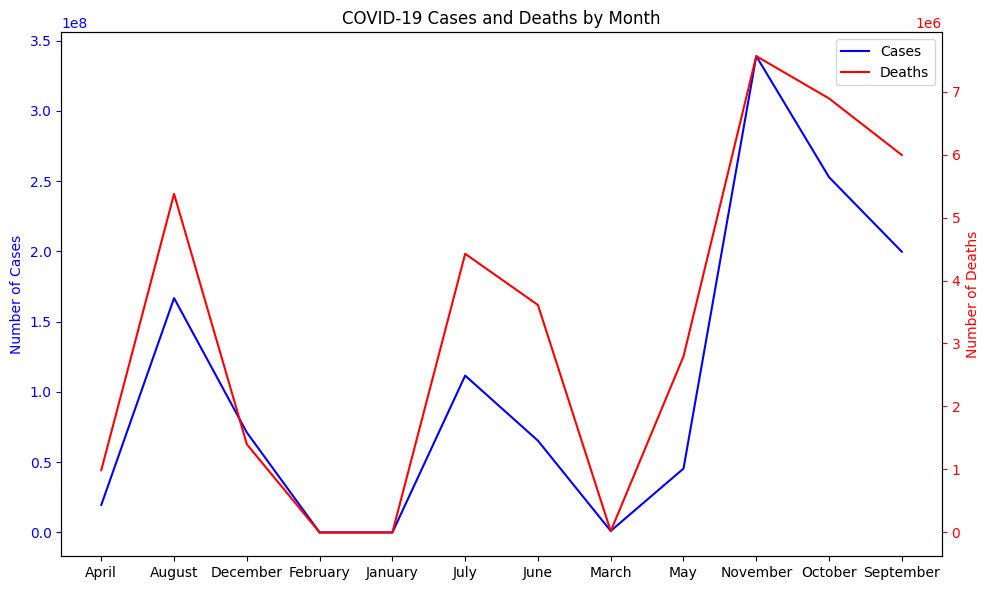

In [25]:
monthly_cases = covid.groupby('month')['cases'].sum()
monthly_deaths = covid.groupby('month')['deaths'].sum()

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

ax1.plot(monthly_cases.index, monthly_cases, label='Cases', color='blue')
ax1.set_ylabel('Number of Cases', color='blue')
ax1.tick_params(axis='y', colors='blue')

ax2.plot(monthly_deaths.index, monthly_deaths, label='Deaths', color='red')
ax2.set_ylabel('Number of Deaths', color='red')
ax2.tick_params(axis='y', colors='red')

plt.title('COVID-19 Cases and Deaths by Month')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='best')

plt.tight_layout()
plt.show()

#### The cases and deaths are relatively dependent on each other. The cases and deaths were lower at the start of the year in the months from January to May; then the cases and deaths started to gradually increase and by the end of the year, both were exponentially increased

## 5) Are there any specific days of the week that have higher numbers of cases or deaths?

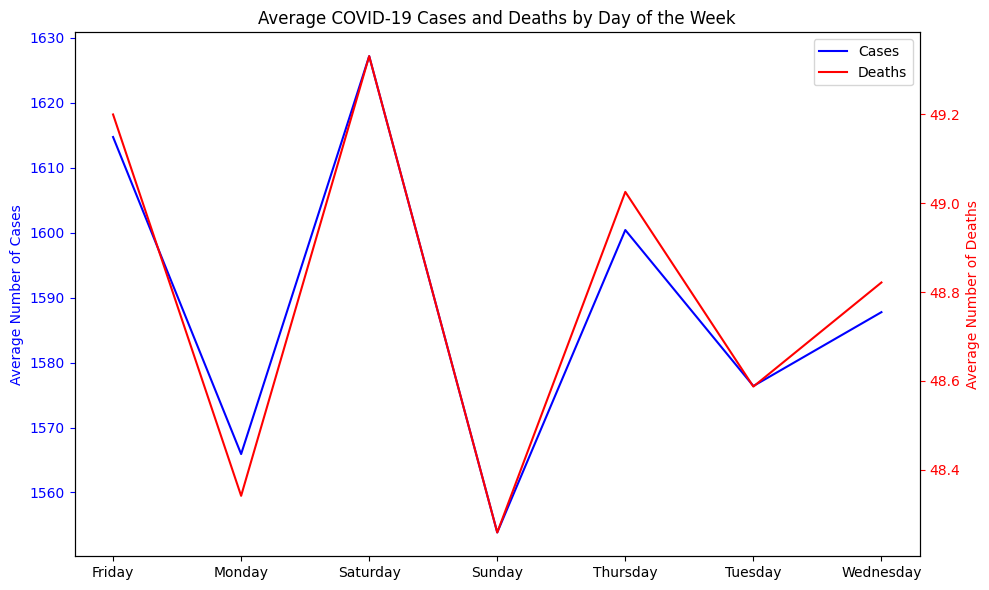

In [26]:
avg_cases_by_day = covid.groupby('day_of_week')['cases'].mean()
avg_deaths_by_day = covid.groupby('day_of_week')['deaths'].mean()

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

ax1.plot(avg_cases_by_day.index, avg_cases_by_day, label='Cases', color='blue')
ax1.set_ylabel('Average Number of Cases', color='blue')
ax1.tick_params(axis='y', colors='blue')

ax2.plot(avg_deaths_by_day.index, avg_deaths_by_day, label='Deaths', color='red')
ax2.set_ylabel('Average Number of Deaths', color='red')
ax2.tick_params(axis='y', colors='red')

plt.title('Average COVID-19 Cases and Deaths by Day of the Week')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='best')

plt.tight_layout()
plt.show()

#### The cases and deaths were relatively higher at the end of the week like from Wednesday to Saturday

## 6) How does the distribution of cases and deaths change over different months and days of the week?

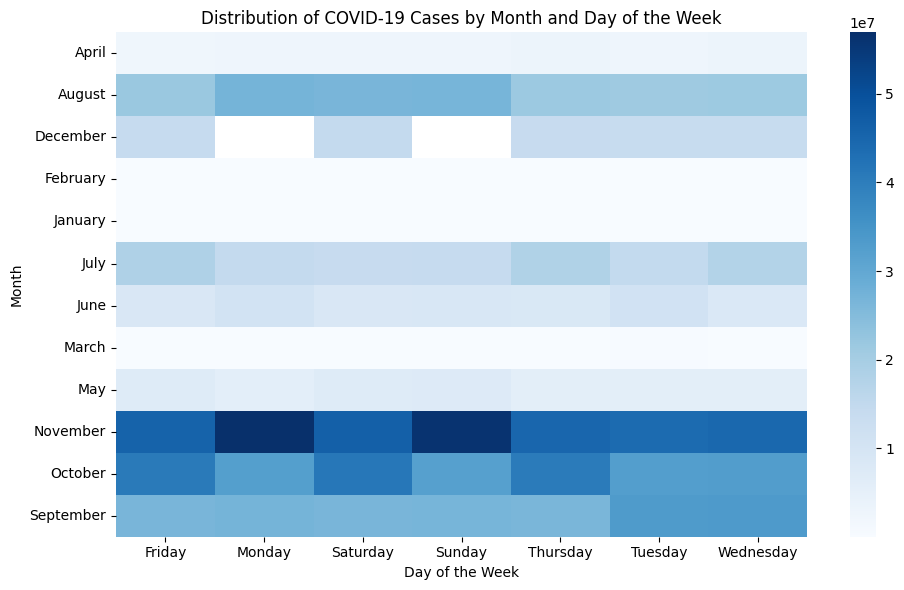

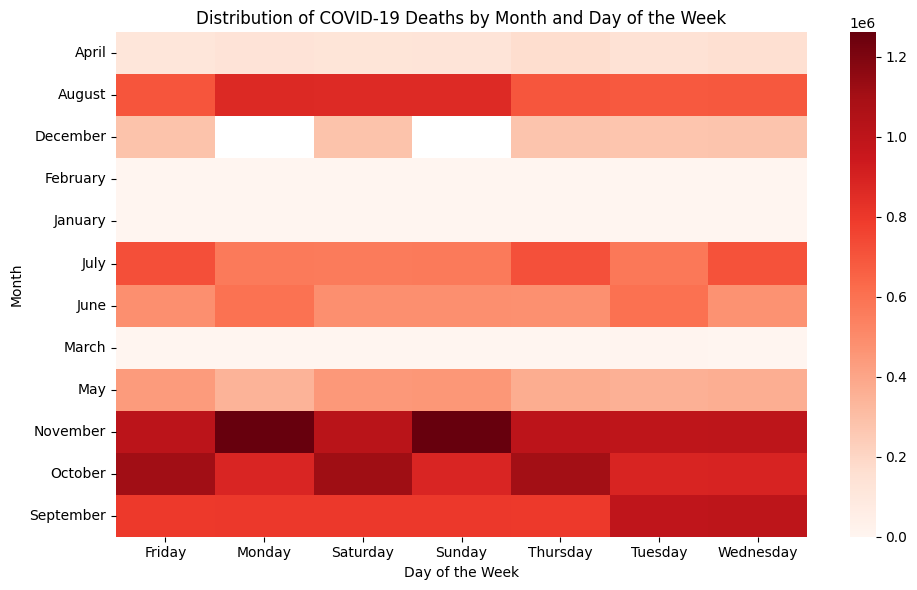

In [28]:
cases_by_month_day = covid.groupby(['month', 'day_of_week'])['cases'].sum().unstack()
deaths_by_month_day = covid.groupby(['month', 'day_of_week'])['deaths'].sum().unstack()

# Create a heatmap for cases by month and day_of_week
plt.figure(figsize=(10, 6))
sns.heatmap(cases_by_month_day, cmap='Blues', fmt='g')

plt.title('Distribution of COVID-19 Cases by Month and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Month')

plt.tight_layout()
plt.show()

# Create a heatmap for deaths by month and day_of_week
plt.figure(figsize=(10, 6))
sns.heatmap(deaths_by_month_day, cmap='Reds', fmt='g')

plt.title('Distribution of COVID-19 Deaths by Month and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Month')

plt.tight_layout()
plt.show()

#### From the above heatmap, it could be said that cases and deaths are dependent on each other: higher the cases, higher the deaths. The cases and deaths were higher in the months of September - November